In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [327]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [328]:
df.shape

(10000, 14)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [330]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [331]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [332]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [333]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


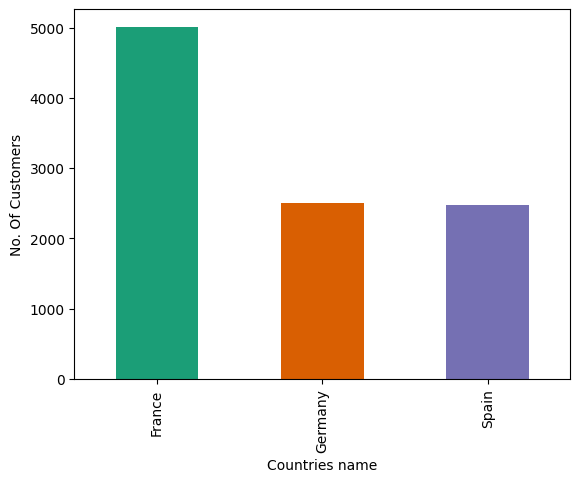

In [334]:
df['Geography'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Countries name')
plt.ylabel('No. Of Customers')
plt.show()

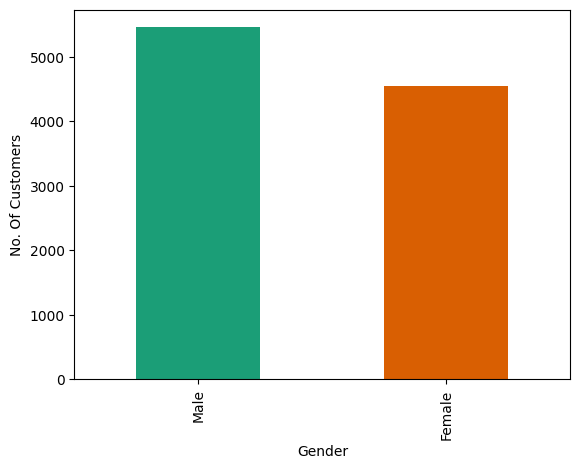

In [335]:
df['Gender'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Gender')
plt.ylabel('No. Of Customers')
plt.show()

In [336]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Geography']=label.fit_transform(df['Geography'])
df['Gender']=label.fit_transform(df['Gender'])

In [337]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [338]:
df['Geography'].unique()

array([0, 2, 1])

In [339]:
df['Gender'].unique()

array([0, 1])

In [340]:
y=df['Exited']
x=df.drop('Exited',axis=1)

In [341]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [342]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [343]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [344]:
xtest.shape
ytrain.shape

(8000,)

In [345]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [346]:
xtrain

array([[ 1.28754087,  0.30373418,  0.90202422, ...,  0.64570298,
        -1.03330429, -1.49624287],
       [ 1.26681977,  0.30373418,  0.90202422, ..., -1.54869968,
        -1.03330429, -1.10127054],
       [-1.49944785, -0.90335646, -1.10861768, ..., -1.54869968,
         0.96776914,  1.63483149],
       ...,
       [-0.80529081, -0.90335646,  0.90202422, ...,  0.64570298,
        -1.03330429, -1.53668114],
       [-1.78954333,  1.51082482,  0.90202422, ...,  0.64570298,
         0.96776914,  1.69551459],
       [ 0.81095544,  1.51082482,  0.90202422, ...,  0.64570298,
        -1.03330429,  0.01053372]])

In [347]:
xtest

array([[ 0.05463508,  0.30373418, -1.10861768, ..., -1.54869968,
         0.96776914, -1.37450532],
       [ 1.75376575,  1.51082482,  0.90202422, ...,  0.64570298,
         0.96776914, -0.70664734],
       [-0.28726316, -0.90335646, -1.10861768, ...,  0.64570298,
         0.96776914, -0.11151981],
       ...,
       [-2.36973429,  1.51082482, -1.10861768, ...,  0.64570298,
         0.96776914, -1.61614689],
       [ 0.47941775,  0.30373418,  0.90202422, ..., -1.54869968,
         0.96776914,  0.40920609],
       [-0.21473929, -0.90335646, -1.10861768, ...,  0.64570298,
        -1.03330429,  1.42981652]])

In [366]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
mod=Sequential()


In [367]:
xtrain.shape

(8000, 10)

In [368]:
xtrain.shape[1]

10

In [369]:
mod.add(Flatten(input_shape=(xtrain.shape[1],)))
mod.add(Dense(units=32,activation='relu'))
mod.add(Dense(units=1,activation='sigmoid'))


In [370]:
mod.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                352       
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [371]:
mod.compile(optimizer='SGD',loss='BinaryCrossentropy',metrics=['accuracy'])

In [372]:
h=mod.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5833 - accuracy: 0.7084 - val_loss: 0.5092 - val_accuracy: 0.7860
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.8040 - val_loss: 0.4711 - val_accuracy: 0.7970
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8102 - val_loss: 0.4542 - val_accuracy: 0.7990
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8135 - val_loss: 0.4457 - val_accuracy: 0.8005
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8177 - val_loss: 0.4405 - val_accuracy: 0.8075
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8194 - val_loss: 0.4370 - val_accuracy: 0.8110
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8224 - val_loss: 0.4343 - val_accuracy: 0.8115

In [373]:
h.history

{'loss': [0.5833311676979065,
  0.47110456228256226,
  0.4443887770175934,
  0.43174317479133606,
  0.4244832694530487,
  0.4197922646999359,
  0.41617485880851746,
  0.4131987988948822,
  0.41058146953582764,
  0.4081129729747772,
  0.40579813718795776,
  0.4035465121269226,
  0.4012838304042816,
  0.39890769124031067,
  0.39662134647369385,
  0.3941786587238312,
  0.39181146025657654,
  0.38933005928993225,
  0.3867909908294678,
  0.3842083215713501,
  0.38150089979171753,
  0.37874361872673035,
  0.37609511613845825,
  0.3734106123447418,
  0.3708095848560333,
  0.3682800829410553,
  0.3659152686595917,
  0.36366915702819824,
  0.36156800389289856,
  0.3596421778202057,
  0.35779181122779846,
  0.3561239540576935,
  0.354581743478775,
  0.3531638979911804,
  0.3518429398536682,
  0.3506624400615692,
  0.3495212495326996,
  0.348704069852829,
  0.3477443754673004,
  0.3469083607196808,
  0.3461688160896301,
  0.34554728865623474,
  0.3448812663555145,
  0.3442574143409729,
  0.343706

In [356]:
h.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [374]:
ypred=mod.predict(xtest)
ypred=(ypred>=0.5)
ypred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [375]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[1503,   63],
       [ 231,  203]])

In [376]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.853

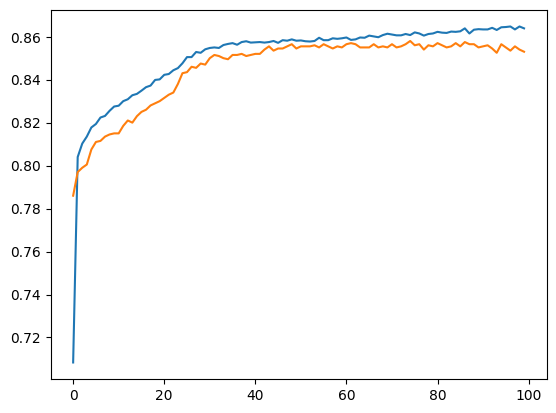

In [377]:
acc=h.history['accuracy']
val_acc=h.history['val_accuracy']
epoch=h.epoch
plt.plot(epoch,acc)
plt.plot(epoch,val_acc)
plt.show()

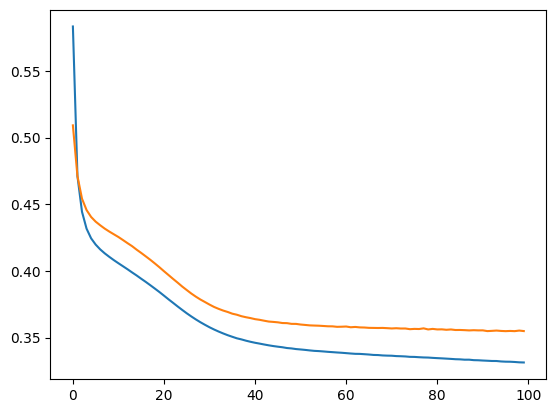

In [378]:
loss=h.history['loss']
val_loss=h.history['val_loss']
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)
plt.show()

In [379]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [363]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [380]:
ms=mod.predict([[502,0,0,42,8,159660.80,3,1,0,113931.57]])

1/1 [==============================] - 0s 37ms/step


In [381]:
np.argmax(ms)

0